# ```Problem Statement:```

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour. 

There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

# ```Business Goals:```

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

# ```Technical Requirements:-```

* There are two types of datasets: Train dataset and Test Dataset
* Train dataset contains- 159571 rows and 8 columns
* Test dataset contains- 153164 rows and 2 columns
* Extensive EDA has to be performed to gain relationships of important variable and price.
* Data contains categorical variable. We need to handle them accordingly.
* We have to build Machine Learning models, apply regularization and determine the optimal values of Hyper 
Parameters. 
* We need to find how much our comments are malignant.

# ```The data set includes:```

* ```Malignant:``` It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
* ```Highly Malignant:``` It denotes comments that are highly malignant and hurtful.
* ```Rude:``` It denotes comments that are very rude and offensive.
* ```Threat:``` It contains indication of the comments that are giving any threat to someone.
* ```Abuse:``` It is for comments that are abusive in nature.
* ```Loathe:``` It describes the comments which are hateful and loathing in nature.
* ```ID:``` It includes unique Ids associated with each comment text given.
* ```Comment text:``` This column contains the comments extracted from various social media platforms.
This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available.

   You need to build a model that can differentiate between comments and its categories.

# ```Import necessary libraries```

In [40]:
import pandas as pd
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import time
from nltk.tokenize import word_tokenize, regexp_tokenize
import wikipedia
import sys
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import xgboost as xgb
import pickle
import time
import PIL

#import plotty
import warnings
warnings.filterwarnings('ignore')

# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss

In [41]:
#importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import norm, stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import statistics as st
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import time
#import csv

#import plotty
import warnings
warnings.filterwarnings('ignore')

# ```Reading the Train CSV Files```

In [42]:
#read the csv file
df1 = pd.read_csv(r"C:\Users\hp-pc\Desktop\Internship22\Malignant comments classifier\Malignant-Comments-Classifier-Project--1---1-\Malignant Comments Classifier Project\train.csv")
df1.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# ```Data Understanding``` 

In [43]:
#check the shape of the dataset
df1.shape

(159571, 8)

In [44]:
#check the columns
df1.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [45]:
#check the null values and datatype
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [46]:
#check the IQR parameters
df1.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
#check the null values
df1.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [48]:
#check the duplicate values
df1.duplicated().sum()

0

```Check the unique value of each count for each and every column```

In [49]:
df1['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [50]:
df1['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [51]:
df1['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

In [52]:
df1['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [53]:
df1['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [54]:
df1['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

# ```Reading the Test CSV Files```

In [55]:
df2 = pd.read_csv(r"C:\Users\hp-pc\Desktop\Internship22\Malignant comments classifier\Malignant-Comments-Classifier-Project--1---1-\Malignant Comments Classifier Project\test.csv")
df2.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [56]:
#check the shape of the test dataset
df2.shape

(153164, 2)

In [57]:
#check the null values
df2.isnull().sum()

id              0
comment_text    0
dtype: int64

In [58]:
#check the data type
df2.dtypes

id              object
comment_text    object
dtype: object

# ```Documentation:-```

1. There are total 8 columns in training dataset.
2. 6 columns belongs to integer type and rest are object type
3. There are no null values found
4. No duplicate values are found
5. In test dataset, there only 2 columns.

# ```Exploratory Data Analysis (EDA)```

```Count plot for all columns```

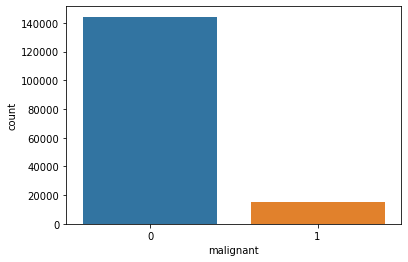

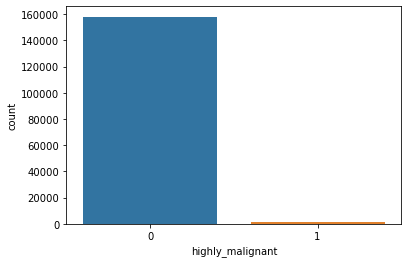

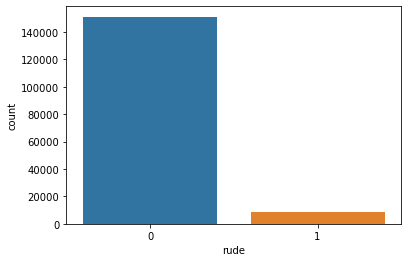

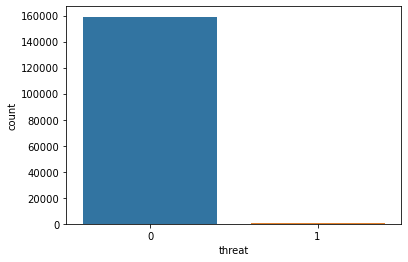

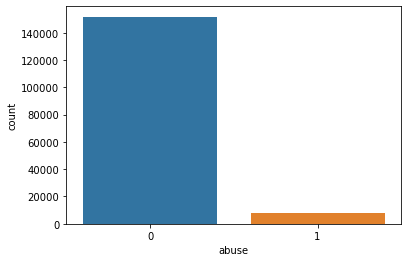

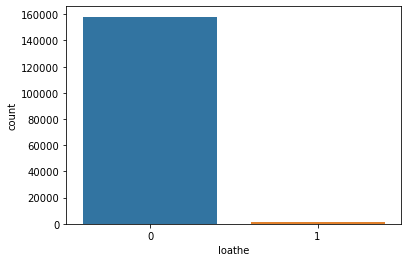

In [59]:
# Plotting countplot for all the features
categories=df1.columns[2:]
for col in categories:
    sns.countplot(df1[col])
    plt.show()

We see above countplots and conclude that data is imbalanced.

In [60]:
# Storing the number of counts for every target label
counts=df1.iloc[:,2:].sum()
counts

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

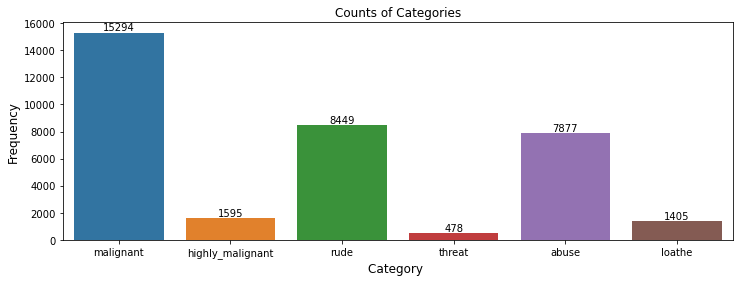

In [61]:
# Plotting the counts of each category
plt.figure(figsize=(12,4))
ax = sns.barplot(counts.index, counts.values)
plt.title("Counts of Categories")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Category ', fontsize=12)
rects = ax.patches
labels = counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

We can calculate the orignal length of the comments in both train and test datatype

In [62]:
#Checking the length of comments and storing it into another column 'original_length'
#Copying df1 into another object df
df = df1.copy()
df['original_length'] = df.comment_text.str.len()
time.sleep(2)
df3 = df2.copy()
df3['original_length'] = df3.comment_text.str.len()

In [63]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [64]:
df3.head()

,id,comment_text,original_length
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41


# ```Data cleaning```

We don't need id column, so, we drop it in both dataset

In [65]:
df.drop(columns='id', inplace = True)
time.sleep(2)
df3.drop(columns='id', inplace = True)

Cleaning the comment column in Training dataset

In [66]:
#Removing and Replacing unwanted characters in the comment_text column

#Replacing '\n' with ' '
df.comment_text = df.comment_text.str.replace('\n',' ').str.lower()

#Keeping only text with letters a to z, 0 to 9 and words like can't, don't, couldn't etc
df.comment_text = df.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

#Removing Stop Words and Punctuations

#Getting the list of stop words of english language as set
stop_words = set(stopwords.words('english'))

#Updating the stop_words set by adding letters from a to z
for ch in range(ord('a'),ord('z')+1):
    stop_words.update(chr(ch))
    
#Updating stop_words further by adding some custom words
custom_words = ("d'aww","mr","hmm","umm","also","maybe","that's","he's","she's","i'll","he'll","she'll","us",
                "ok","there's","hey","heh","hi","oh","bbq","i'm","i've","nt","can't","could","ur","re","ve",
                "rofl","lol","stfu","lmk","ily","yolo","smh","lmfao","nvm","ikr","ofc","omg","ilu")
stop_words.update(custom_words)

#Checking the new list of stop words
print("New list of custom stop words are as follows:\n\n")
print(stop_words)

New list of custom stop words are as follows:


{'mustn', 'bbq', 'yours', 'all', 'himself', 'any', 'f', 'she', 'yourself', 'out', "didn't", 'there', 'wasn', 'oh', 'than', 'so', 'shan', "he's", 'could', 'o', 'ikr', 'below', 'has', 've', "weren't", 'heh', 'nt', 'some', 'us', "mustn't", 'further', 'maybe', 'about', "should've", 'down', 'aren', 'mightn', 'with', "don't", 'yourselves', 'which', 'ily', 'be', 'ilu', 'theirs', 'those', 'while', 'c', 'herself', "d'aww", 'lmfao', 'during', "couldn't", "you'll", 'but', 'hadn', 'we', "aren't", "haven't", 'hi', 'her', 'because', 'once', "shouldn't", 'where', 'up', 'just', 'isn', 'other', 'r', "you're", 'ma', 'did', 'is', 'v', 'myself', 'do', 'such', 'very', "there's", 'over', 'yolo', 'lmk', 'q', "i'll", 'and', 'ain', "doesn't", 'h', 'my', 'having', 'umm', 'above', 'this', 'an', 'smh', 'who', 'off', 'ourselves', 'l', "hadn't", 'each', 'when', 'to', 'hers', 'rofl', 'can', 'by', 'our', 'have', 'of', 'weren', 'p', 'its', 'nvm', "you've", 'after', 'been

In [67]:
#Removing stop words
df.comment_text = df.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

#Removing punctuations
df.comment_text = df.comment_text.str.replace("[^\w\d\s]","")

In [68]:
df.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
27314,indeed qualification judge others intentions c...,1,0,0,0,0,0,232
59884,yet another locked article ndp first smeared h...,0,0,0,0,0,0,195
58169,thilo sarrazin tradition,0,0,0,0,0,0,33
28545,asshole creamy go suck mommys dried saggy crus...,1,0,1,0,1,1,190
92544,agreed less artistic informative map would nice,0,0,0,0,0,0,64
7959,dogshit reference really necessary think adds ...,0,0,0,0,0,0,224
55812,sci fi star wars episodes iv close encounters ...,0,0,0,0,0,0,3565
34796,well ridiculous metacritic ultimate source agg...,0,0,0,0,0,0,416
11717,cheshire get life dude like real trustworthy w...,1,0,0,0,0,0,168
22815,social question entire section unsourced analy...,0,0,0,0,0,0,273


In [69]:
df['Cleaned_length'] = df.comment_text.str.len()

In [70]:
df.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length,Cleaned_length
111000,article lacks dates sources etc,0,0,0,0,0,0,39,31
61693,sad one sad fuck try get basement sunshine,1,0,1,0,1,0,86,42
100413,mentioned time wiesenthal center brought one g...,0,0,0,0,0,0,533,348
48423,assuming artillery bunker small hill shore ser...,0,0,0,0,0,0,2024,1306
71978,welcome hello welcome wikipedia thank contribu...,0,0,0,0,0,0,2186,1395
142832,welcome hello welcome wikipedia thank contribu...,0,0,0,0,0,0,625,391
44568,message page linked said convention user page ...,0,0,0,0,0,0,141,67
109526,faggot quit fucking wit mii sht niqqa,1,0,1,0,1,1,39,37
56164,revert irc nick parameters thanks comments rev...,0,0,0,0,0,0,1911,1157
114728,ecw new gangrel jannetty valet bischoff sylves...,0,0,0,0,0,0,1118,694


Cleaning the comment column in Test dataset

In [71]:
#Removing and Replacing unwanted characters in the comment_text column

#Replacing '\n' with ' '
df3.comment_text = df3.comment_text.str.replace('\n',' ').str.lower()

#Keeping only text with letters a to z, 0 to 9 and words like can't, don't, couldn't etc
df3.comment_text = df3.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

#Removing Stop Words and Punctuations

#Getting the list of stop words of english language as set
stop_words = set(stopwords.words('english'))

#Updating the stop_words set by adding letters from a to z
for ch in range(ord('a'),ord('z')+1):
    stop_words.update(chr(ch))
    
#Updating stop_words further by adding some custom words
custom_words = ("d'aww","mr","hmm","umm","also","maybe","that's","he's","she's","i'll","he'll","she'll","us",
                "ok","there's","hey","heh","hi","oh","bbq","i'm","i've","nt","can't","could","ur","re","ve",
                "rofl","lol","stfu","lmk","ily","yolo","smh","lmfao","nvm","ikr","ofc","omg","ilu")
stop_words.update(custom_words)

#Checking the new list of stop words
print("New list of custom stop words are as follows:\n\n")
print(stop_words)

New list of custom stop words are as follows:


{'mustn', 'bbq', 'yours', 'all', 'himself', 'any', 'f', 'she', 'yourself', 'out', "didn't", 'there', 'wasn', 'oh', 'than', 'so', 'shan', "he's", 'could', 'o', 'ikr', 'below', 'has', 've', "weren't", 'heh', 'nt', 'some', 'us', "mustn't", 'further', 'maybe', 'about', "should've", 'down', 'aren', 'mightn', 'with', "don't", 'yourselves', 'which', 'ily', 'be', 'ilu', 'theirs', 'those', 'while', 'c', 'herself', "d'aww", 'lmfao', 'during', "couldn't", "you'll", 'but', 'hadn', 'we', "aren't", "haven't", 'hi', 'her', 'because', 'once', "shouldn't", 'where', 'up', 'just', 'isn', 'other', 'r', "you're", 'ma', 'did', 'is', 'v', 'myself', 'do', 'such', 'very', "there's", 'over', 'yolo', 'lmk', 'q', "i'll", 'and', 'ain', "doesn't", 'h', 'my', 'having', 'umm', 'above', 'this', 'an', 'smh', 'who', 'off', 'ourselves', 'l', "hadn't", 'each', 'when', 'to', 'hers', 'rofl', 'can', 'by', 'our', 'have', 'of', 'weren', 'p', 'its', 'nvm', "you've", 'after', 'been

In [72]:
#Removing stop words
df3.comment_text = df3.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

#Removing punctuations
df3.comment_text = df3.comment_text.str.replace("[^\w\d\s]","")

In [73]:
df3.sample(10)

,comment_text,original_length
124162,monkey indeed heres get smart treat best wishe...,120
134948,im going kill,27
55568,see wp list independent sources show clear not...,92
18676,start attention south africa yes south africa ...,60
132146,confident edit policy compliant edit bold reve...,143
143030,article states large amount money earned sale ...,401
141325,jerk ever realized site joke wikipedia worthle...,338
3848,speaking english montrealers would refer speak...,101
37190,using page anymore use,65
109766,example claim please retract personal attack v...,147


In [74]:
df3['Cleaned_length'] = df3.comment_text.str.len()

In [75]:
df3.sample(10)

,comment_text,original_length,Cleaned_length
58804,representations presented buy amount stuff wou...,216,84
46181,good call somehow never thought google thing c...,503,335
26829,take dick ass stop faggot,72,25
8992,damn rich country environmentalists protecting...,111,78
99524,annoying confusing hell calling vandal dumb,111,43
102907,penis shrugged looking article book penis shru...,122,75
7924,seems somebody changed one citation templates ...,158,84
107674,nope type muhammad search go page see muhammad...,162,98
16875,use nazi german flag instead austrian flag thi...,331,205
30315,guy jackass pov fact,48,20


First we see in both the dataset, id column is unnecessary, so, we simply drop it. then we need to clean the comment column in both the dataset, first we remove \n, punctuations, stop words and make all the things in lower case. and finally, we compare orignal length of the particular comments and the cleaned length.

# ```Visualization```

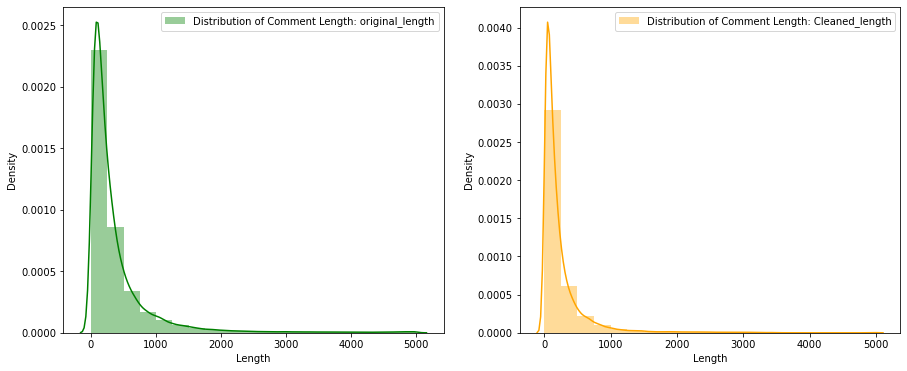

In [76]:
#Comparing the comment text length distribution before cleaning and after cleaning.

fig, ax = plt.subplots(1,2,figsize=(15,6))
j=0
colors = ['Green','Orange']
for i in df.columns[-2:]:
    label_text = f"Distribution of Comment Length: {i}"
    sns.distplot(df[i],ax=ax[j],bins=20,color=colors[j],label=label_text)
    ax[j].set_xlabel("Length")
    ax[j].legend()
    j += 1
plt.show()

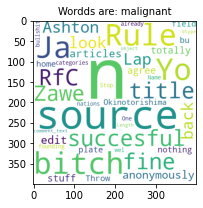

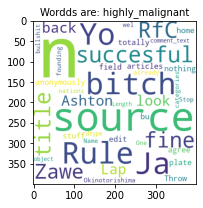

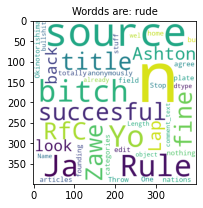

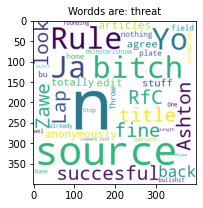

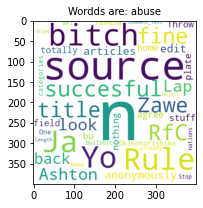

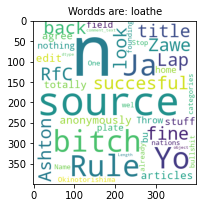

In [77]:
for i in df.columns[1:7]:
    df4 = df[(df[i]==1)]
    wordcloud = WordCloud(background_color = 'white', max_words= 500, stopwords= STOPWORDS, height=400, width=400).generate(str(df2['comment_text']))
    plt.figure(figsize=(3,3))
    plt.imshow(wordcloud)
    plt.title(label= f"Wordds are: {i}",fontdict={'fontsize':10, 'fontweight':10, 'color':'black'})
    plt.show()

In [78]:
# Creating a new feature having malignant and non malignant information for the particular comment.
label_cols = [ 'malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']
df['label'] = 1-df[label_cols].max(axis=1)

In [79]:
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length,Cleaned_length,label
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,158,1
1,matches background colour seemingly stuck than...,0,0,0,0,0,0,112,65,1
2,man really trying edit war guy constantly remo...,0,0,0,0,0,0,233,137,1
3,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622,374,1
4,sir hero chance remember page,0,0,0,0,0,0,67,29,1
...,...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,295,181,1
159567,ashamed horrible thing put talk page,0,0,0,0,0,0,99,36,1
159568,spitzer theres actual article prostitution rin...,0,0,0,0,0,0,81,62,1
159569,looks like actually put speedy first version d...,0,0,0,0,0,0,116,57,1


In [80]:
# Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [81]:
# Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(df['comment_text'])

In [82]:
y=df['label']

In [83]:
X.shape #check the shape of X

(159571, 15000)

In [84]:
y.shape #check the shape of y

(159571,)

In [85]:
# Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X_test = tf_vec.fit_transform(df3['comment_text'])

In [86]:
X_test.shape #check the shape of x_test

(153164, 15000)

In [87]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss

# ```Building the model```

In [88]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=43)

In [89]:
y_train.head()

101064    1
24418     1
129563    0
42446     1
80118     1
Name: label, dtype: int64

In [92]:
log_reg = LogisticRegression() #Model instantiating
dt = DecisionTreeClassifier()
rf= RandomForestClassifier()
knn = KNeighborsClassifier()
mb=MultinomialNB()
ada = AdaBoostClassifier()
gbdt= GradientBoostingClassifier()
xgbr = xgb.XGBRegressor()

In [93]:
#appending every model into the empty list
models= []
models.append(('Logistic Regression',log_reg))
models.append(('MultinomialNB',mb))
models.append(('DecisionTreeClassifier',dt))
models.append(('KNeighborsClassifier',knn))
models.append(('RandomForestClassifier',rf))
models.append(('AdaBoostClassifier', ada))
models.append(('GradientBoostingClassifier',gbdt))

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.9555059784924673


cross_val_score:  0.9558503708624496


roc_auc_score:  0.8006669985067196


Hamming_loss: 0.04449402150753265


Log_loss : 1.5368007285715841


Classification report:
 
              precision    recall  f1-score   support

           0       0.93      0.61      0.73      4018
           1       0.96      0.99      0.98     35875

    accuracy                           0.96     39893
   macro avg       0.94      0.80      0.85     39893
weighted avg       0.95      0.96      0.95     39893



Confusion matrix: 

[[ 2438  1580]
 [  195 35680]]


AUC_ROC curve:



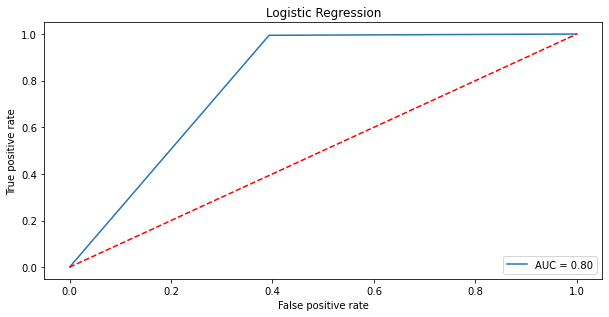





****************************** MultinomialNB ***************************


MultinomialNB()


accuracy_score:  0.9465069059734791


cross_val_score:  0.9474779269066284


roc_auc_score:  0.7500258835241413


Hamming_loss: 0.05349309402652094


Log_loss : 1.8476259600535885


Classification report:
 
              precision    recall  f1-score   support

           0       0.93      0.50      0.65      4018
           1       0.95      1.00      0.97     35875

    accuracy                           0.95     39893
   macro avg       0.94      0.75      0.81     39893
weighted avg       0.95      0.95      0.94     39893



Confusion matrix: 

[[ 2025  1993]
 [  141 35734]]


AUC_ROC curve:



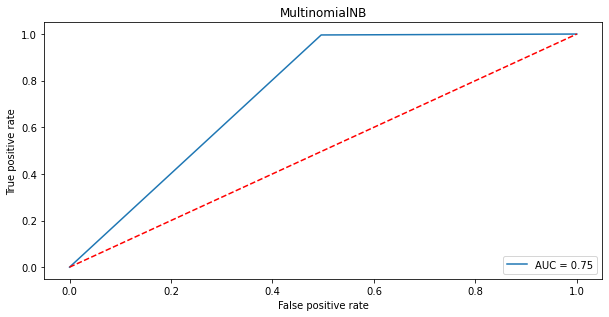





****************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier()


accuracy_score:  0.9408918857945003


cross_val_score:  0.9420007367245814


roc_auc_score:  0.8304440019910404


Hamming_loss: 0.05910811420549971


Log_loss : 2.0415467335427406


Classification report:
 
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      4018
           1       0.97      0.97      0.97     35875

    accuracy                           0.94     39893
   macro avg       0.84      0.83      0.83     39893
weighted avg       0.94      0.94      0.94     39893



Confusion matrix: 

[[ 2781  1237]
 [ 1121 34754]]


AUC_ROC curve:



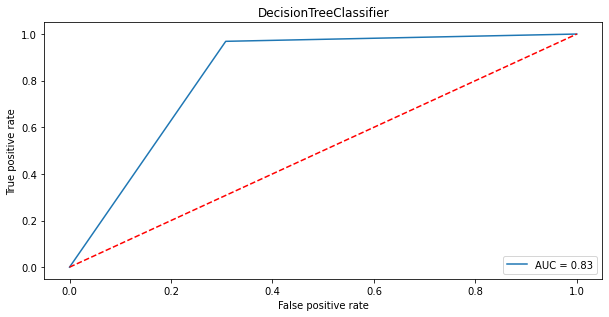





****************************** KNeighborsClassifier ***************************


KNeighborsClassifier()


accuracy_score:  0.9184568721329557


cross_val_score:  0.9173534066285832


roc_auc_score:  0.622048780487805


Hamming_loss: 0.08154312786704435


Log_loss : 2.8164601910337494


Classification report:
 
              precision    recall  f1-score   support

           0       0.81      0.25      0.38      4018
           1       0.92      0.99      0.96     35875

    accuracy                           0.92     39893
   macro avg       0.86      0.62      0.67     39893
weighted avg       0.91      0.92      0.90     39893



Confusion matrix: 

[[ 1008  3010]
 [  243 35632]]


AUC_ROC curve:



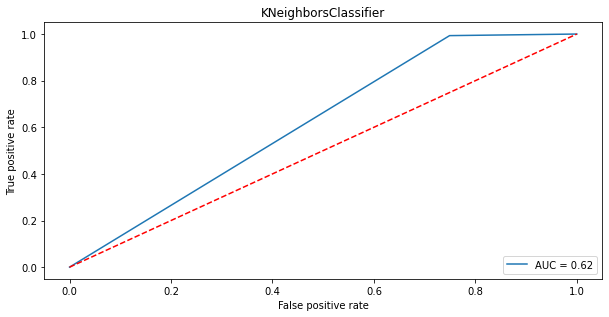





****************************** RandomForestClassifier ***************************


RandomForestClassifier()


accuracy_score:  0.9561326548517284


cross_val_score:  0.9576865446127734


roc_auc_score:  0.8368183175709307


Hamming_loss: 0.043867345148271626


Log_loss : 1.5151495998161595


Classification report:
 
              precision    recall  f1-score   support

           0       0.85      0.69      0.76      4018
           1       0.97      0.99      0.98     35875

    accuracy                           0.96     39893
   macro avg       0.91      0.84      0.87     39893
weighted avg       0.95      0.96      0.95     39893



Confusion matrix: 

[[ 2762  1256]
 [  494 35381]]


AUC_ROC curve:



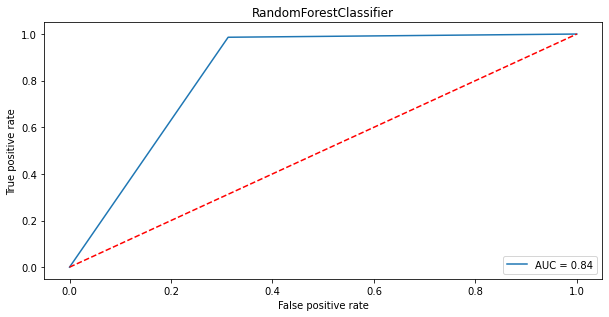





****************************** AdaBoostClassifier ***************************


AdaBoostClassifier()


accuracy_score:  0.9445266086782143


cross_val_score:  0.9452970762496197


roc_auc_score:  0.7579860627177701


Hamming_loss: 0.055473391321785775


Log_loss : 1.9160213619589017


Classification report:
 
              precision    recall  f1-score   support

           0       0.87      0.52      0.66      4018
           1       0.95      0.99      0.97     35875

    accuracy                           0.94     39893
   macro avg       0.91      0.76      0.81     39893
weighted avg       0.94      0.94      0.94     39893



Confusion matrix: 

[[ 2107  1911]
 [  302 35573]]


AUC_ROC curve:



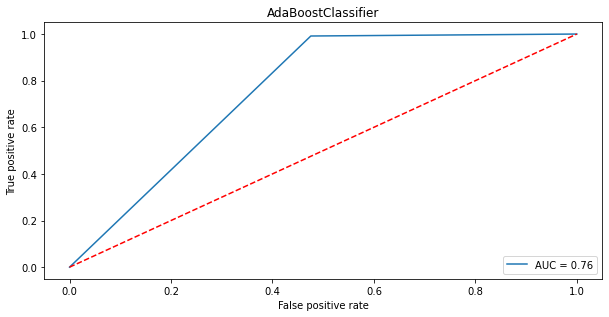





****************************** GradientBoostingClassifier ***************************


GradientBoostingClassifier()


accuracy_score:  0.9395382648584965


cross_val_score:  0.939030275347057


roc_auc_score:  0.7103484320557492


Hamming_loss: 0.06046173514150352


Log_loss : 2.088320791411284


Classification report:
 
              precision    recall  f1-score   support

           0       0.95      0.42      0.59      4018
           1       0.94      1.00      0.97     35875

    accuracy                           0.94     39893
   macro avg       0.94      0.71      0.78     39893
weighted avg       0.94      0.94      0.93     39893



Confusion matrix: 

[[ 1701  2317]
 [   95 35780]]


AUC_ROC curve:



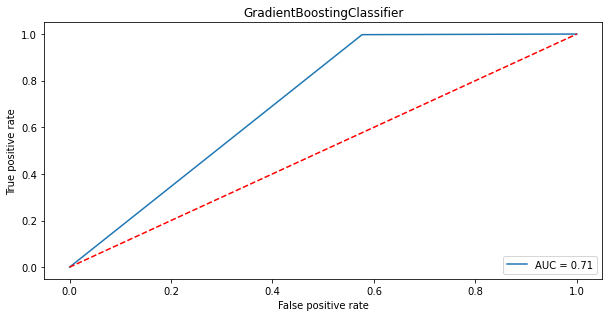





Total time taken (in mins):------> 59.62511635621389


In [94]:
start_time = time.time()

# Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
h_loss=[]
l_loss=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score: ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    hloss = hamming_loss(y_test, pre)
    print("Hamming_loss:", hloss)
    h_loss.append(hloss)
    print('\n')
    try : 
        loss = log_loss(y_test, pre)
    except :
            loss = log_loss(y_test, pre.toarray())   
    print("Log_loss :", loss)
    l_loss.append(loss)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,50))
    plt.subplot(912)
    print('AUC_ROC curve:\n')
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('\n\n\n')
    
    
end_time = time.time()
T = (end_time - start_time)/60
print("Total time taken (in mins):------>", T )

```Gridsearchcv by using Random Forest classifier as a estimator```

In [ ]:
start_time = time.time()

params = {'min_samples_leaf': [1, 2, 4], 'n_estimators':[10,20,30],
         'max_features':['auto',"sqrt","log2"],
         'min_samples_split':[10,11]}

gridsearch = GridSearchCV(estimator=rf, param_grid= params)#apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params
rfc = gridsearch.best_estimator_
print('Trained Model using best parameters:----->',rfc.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
y_pred = rfc.predict(x_test) # predict it
r2_score(y_test, y_pred) # get the improved r2 score
print('Accuracy score:------>',r2_score(y_test, y_pred))#check the accuracy score
print("\n",'*'*50)

end_time = time.time()
T = (end_time - start_time)/60
print("Total time taken (in mins):------>", T )